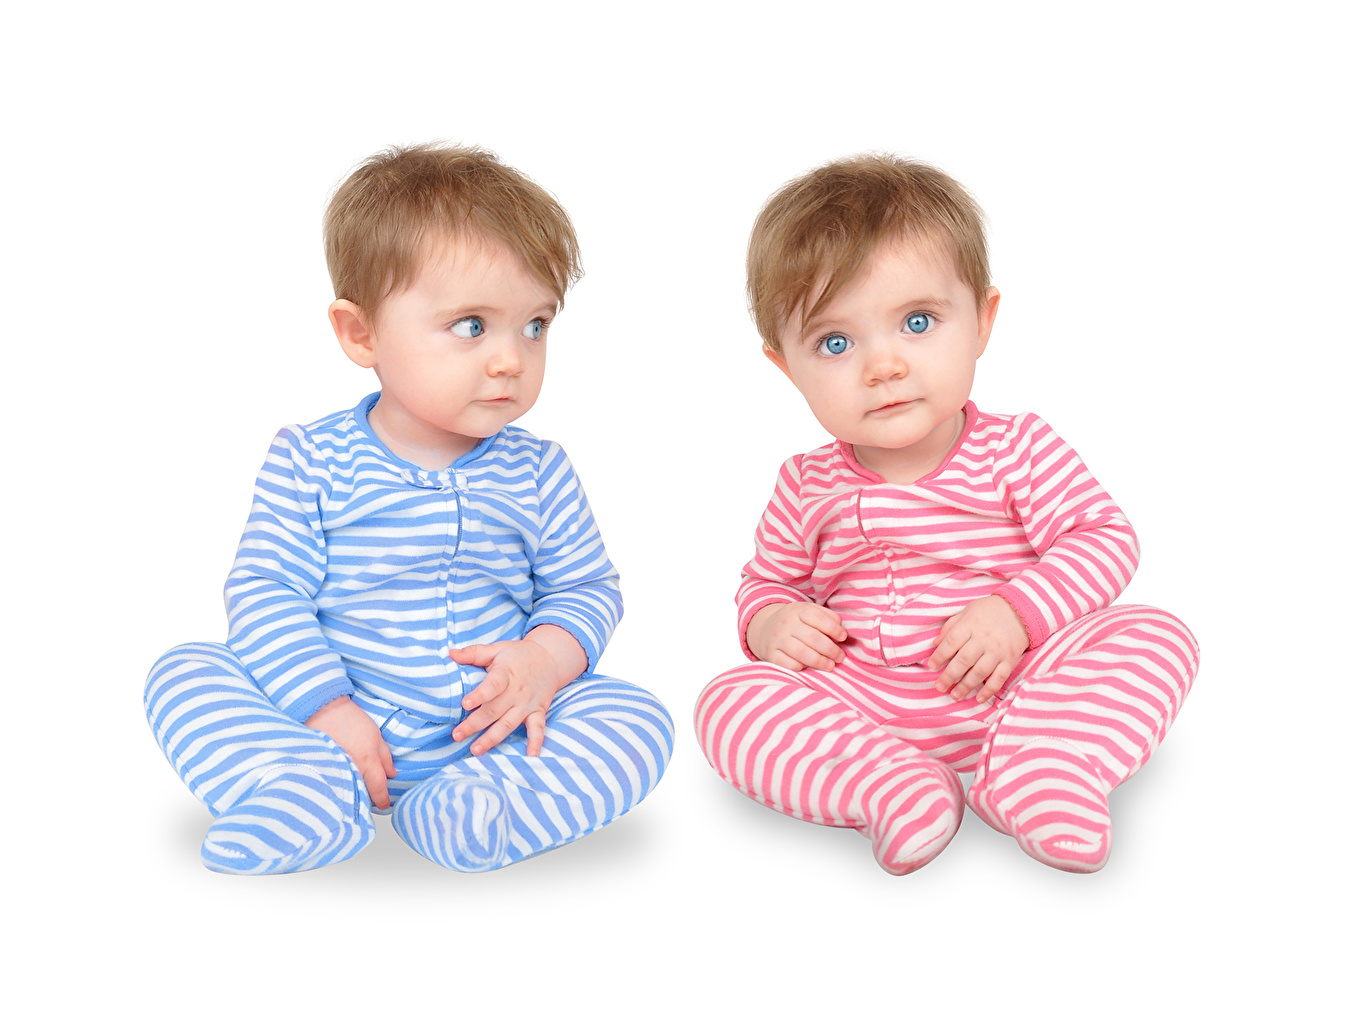

In [11]:
# github ne veut pas afficher mes images en markdown
from IPython.display import Image
Image(filename="Images/TwoBoys.jpg")



# Le paradoxe des deux enfants

Il est difficile de fixer la paternité ou la maternité de ce paradoxe à un auteur précis. Toujours est-il qu'il est proposé dans un article de Martin Gardner dans la revue Scientific American en 1959 sous le titre The Two Children Problem. La formulation d'origine est la suivante :

* M. Jones a deux enfants. Le plus vieux des enfants est une fille. Quelle est la probabilité que les deux enfants soient des filles ?
* M. Smith a deux enfants. Au moins l'un des deux est un garçon. Quelle est la probabilité que les deux enfants soient des garçons ?

Le problème posé peut-être reformulé par comment estimer le sexe d'un enfant parmi deux à partir de l'observation de l'autre ?


## Simulation

La première chose à faire est de créer les échantillons.

In [8]:
import random

genre = ["Garçon","Fille"]
nbTirage = 100000

def echantillon(nombre=nbTirage, valeurs=genre):
    gosses = []
    for i in range(0,nombre):
        enfant = random.choice(genre)
        gosses.append(enfant)
    return gosses

premierEnfant=echantillon()
deuxiemeEnfant=echantillon()
famille = [premierEnfant,deuxiemeEnfant]



## Interprétations

Le paradoxe repose sur l'interprétation et la façon dont on a acquis les informations en notre possession. Considérons maintenant le cas de M. Smith. Il a été observé que l'un des enfants est un garçon, plusieurs possibilités peuvent donner ce résultat :
1. Au moins un des deux enfants est un garçon, on ne sait pas lequel. Cela correspond à la formulation de Gardner.
2. Le premier enfant est un garçon.
3. Le second enfant est un garçon.
4. L'un des enfants est un garçon sans que l'on sache si c'est le premier ou le deuxième.

Examinons pour commencer le cas 1.

In [9]:
# Cas 1 - Les deux enfants sont des garçons

def cas1(f, sexe):
    cumul=0
    combienPaireAvec=0
    for i in range(len(f[0])):
        if (f[0][i] == sexe) or (f[1][i] == sexe): # Au moins un
            combienPaireAvec += 1
            if (f[0][i] == f[1][i]): # les 2
                cumul += 1
    return cumul / combienPaireAvec


print(cas1(famille, genre[0]))


0.3309314189054196


La probabilité que les deux soient des garçons sachant que l'un des enfants est un garçon est donc de $\frac{1}{3}$. On peut également le déterminer en utilisant un tableau :

<table style="text-align:center">
    <tbody>
        <tr>
            <th colspan="2" rowspan="2"></th>
            <th colspan="2">Sexe du deuxième enfant</th>
        </tr>
        <tr bgcolor="#dddddd">
            <td>Fille</td>
            <td>Garçon</td>
        </tr>
        <tr>
            <th rowspan="2" scope="row">Sexe du premier enfant</th>
                <td bgcolor="#dddddd">Fille</td>
                <td>FF</td>
                <td>FG</td>
        </tr>
        <tr>
            <td bgcolor="#dddddd">Garçon</td>
            <td>GF</td>
            <td>GG</td>
        </tr>
    </tbody>
</table>

Le cas $FF$ n'est pas possible, il y a donc 3 cas possibles et $GG$ est l'un de ces cas équiprobables, la probabilité est donc de  $\frac{1}{3}$. Ce cas correspond au scénario où vous avez posé la question 
> " M. Smith avez vous au moins un garçon ? - Oui "


Considérons maintenant le cas 2. On sait que le premier enfant est un garçon, quelle est la probabilité que l'autre enfant soit un garçon (ou que les deux soient des garçons, c'est la même question) ?

In [10]:
def cas2(f, sexe):
    cumul=0
    combienGarconPremier=0
    for i in range(len(f[0])):
        if (f[0][i] == sexe): 
            combienGarconPremier += 1
            if (f[0][i] == f[1][i]): # les 2
                cumul += 1
    return cumul / combienGarconPremier


print(cas2(famille, genre[0]))


0.4959182451448075


Le cas 3 est identique, on obtiendra le même résultat et le cas 4 un mélange des deux, l'ordre n'ayant pas d'influence ici, on retrouvera le même résultat. 

Comment ces situations ambigue peuvent se produire ? Imaginons que vous demandiez à M. Smith qui a deux enfants, 
de vous donner le sexe d’un de ses enfants et qu'il vous réponde " Garçon ". C'est le début de l'embrouille, il a donc au moins un garçon !

[![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggVERcbiAgICBBKFwiIFwiKSAtLT4gfDEvMnwgQihHKVxuICAgIEEgLS0-IHwxLzJ8IEMoRilcbiAgICBCIC0tPiB8MS8yfCBEKEcpXG4gICAgQiAtLT4gfDEvMnwgRShGKVxuICAgIEMgLS0-IHwxLzJ8IEYoRylcbiAgICBDIC0tPiB8MS8yfCBHKEYpXG4gICAgRCAtLT4gfEdHfCBIKEdHKVxuICAgIEggLS0-IHwxfCBISChHKVxuICAgIEhIIC0tPiBJKHA9MS80KVxuICAgIEcgLS0-IHxGRnwgSihGRilcbiAgICBKIC0tPiB8MXwgSkooRilcbiAgICBKSiAtLT4gSyhwPTEvNClcbiAgICBFIC0tPiB8R0Z8IEdGKEdGKVxuICAgIEdGIC0tPiB8MS8yfCBHRkYoRilcbiAgICBHRiAtLT4gfDEvMnwgR0ZEKEcpXG4gICAgR0ZGIC0tPiBHRkZQKHA9MS84KVxuICAgIEdGRCAtLT4gR0ZGRChwPTEvOClcbiAgICBGIC0tPiB8Rkd8IEZHKEZHKVxuICAgIEZHIC0tPiB8MS8yfCBGR0YoRilcbiAgICBGRyAtLT4gfDEvMnwgRkdEKEcpXG4gICAgRkdGIC0tPiBGR0ZQKHA9MS84KVxuICAgIEZHRCAtLT4gRkdGRChwPTEvOClcblxuICAgIETDqWJ1dCAtLi0gRW5mYW50MShFbmZhbnQgMSkgLS4tIEVuZmFudDIoRW5mYW50IDIpIC0uLi0gUsOpcG9uc2UoUsOpcG9uc2UgU21pdGgpIC0uLSBQKHByb2JhKVxuICAgIFxuICAgICIsIm1lcm1haWQiOnsidGhlbWUiOiJkZWZhdWx0In0sInVwZGF0ZUVkaXRvciI6ZmFsc2UsImF1dG9TeW5jIjpmYWxzZSwidXBkYXRlRGlhZ3JhbSI6ZmFsc2V9)](https://mermaid.live/edit/#eyJjb2RlIjoiZ3JhcGggVERcbiAgICBBKFwiIFwiKSAtLT4gfDEvMnwgQihHKVxuICAgIEEgLS0-IHwxLzJ8IEMoRilcbiAgICBCIC0tPiB8MS8yfCBEKEcpXG4gICAgQiAtLT4gfDEvMnwgRShGKVxuICAgIEMgLS0-IHwxLzJ8IEYoRylcbiAgICBDIC0tPiB8MS8yfCBHKEYpXG4gICAgRCAtLT4gfEdHfCBIKEdHKVxuICAgIEggLS0-IHwxfCBISChHKVxuICAgIEhIIC0tPiBJKHA9MS80KVxuICAgIEcgLS0-IHxGRnwgSihGRilcbiAgICBKIC0tPiB8MXwgSkooRilcbiAgICBKSiAtLT4gSyhwPTEvNClcbiAgICBFIC0tPiB8R0Z8IEdGKEdGKVxuICAgIEdGIC0tPiB8MS8yfCBHRkYoRilcbiAgICBHRiAtLT4gfDEvMnwgR0ZEKEcpXG4gICAgR0ZGIC0tPiBHRkZQKHA9MS84KVxuICAgIEdGRCAtLT4gR0ZGRChwPTEvOClcbiAgICBGIC0tPiB8Rkd8IEZHKEZHKVxuICAgIEZHIC0tPiB8MS8yfCBGR0YoRilcbiAgICBGRyAtLT4gfDEvMnwgRkdEKEcpXG4gICAgRkdGIC0tPiBGR0ZQKHA9MS84KVxuICAgIEZHRCAtLT4gRkdGRChwPTEvOClcblxuICAgIETDqWJ1dCAtLi0gRW5mYW50MShFbmZhbnQgMSkgLS4tIEVuZmFudDIoRW5mYW50IDIpIC0uLi0gUsOpcG9uc2UoUsOpcG9uc2UgU21pdGgpIC0uLSBQKHByb2JhKVxuICAgIFxuICAgICIsIm1lcm1haWQiOiJ7XG4gIFwidGhlbWVcIjogXCJkZWZhdWx0XCJcbn0iLCJ1cGRhdGVFZGl0b3IiOmZhbHNlLCJhdXRvU3luYyI6ZmFsc2UsInVwZGF0ZURpYWdyYW0iOmZhbHNlfQ)

Soit les événements suivants :
* $GG$ Smith à deux garçons ;
* $g$ Smith à répondu garçon ;

$$
p(GG|g) = \frac{p(g|GG) \times p(GG)}{p(g)}
$$

* $p(g|GG) = 1$ Smith à 2 garçons il ne peut que répondre garçon !
* $p(GG)=\displaystyle \frac{1}{4}$ C'est l'une des possibilités parmi les 4.
* $p(g) = \displaystyle \frac{1}{4} + \frac{1}{8} + \frac{1}{8}$ cela correspond aux différents cas où Smith répond garçon.

$$
p(GG|g) = \frac{1}{2} 
$$